In [1]:
import sys
sys.path.insert(0, '../code/')
from dismod_db import DismodDB
from two_level import TwoLevel
from plot_two_level import PlotTwoLevel
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
raw_data_incidence = xr.open_dataarray('./data/maternal_obstruct.nc')
raw_data_death = xr.open_dataarray('./data/maternal_obstruct_death.nc')

In [3]:
age_metadata = pd.read_csv('./data/age_metadata.csv')
location_metadata = pd.read_csv('./data/location_metadata.csv')
age_id_to_range = {}
for i, row in age_metadata.iterrows():
    age_id_to_range[row['age_group_id']] = (row['age_group_years_start'], row['age_group_years_end'])
location_id_to_name = {}
for i, row in location_metadata.iterrows():
    location_id_to_name[row['location_id']] = row['location_name']

In [4]:
incidence_data = raw_data_incidence.loc[dict(location_id=slice(101,102))].mean("draw").to_dataframe().reset_index()
death_data = raw_data_death.loc[dict(location_id=slice(101,102))].mean("draw").to_dataframe().reset_index()
incidence_data_std = raw_data_incidence.loc[dict(location_id=slice(101,102))].std("draw").to_dataframe().reset_index()
death_data_std = raw_data_death.loc[dict(location_id=slice(101,102))].std("draw").to_dataframe().reset_index()

In [5]:
incidence_data = incidence_data[incidence_data['age_group_id'].isin(list(age_id_to_range.keys()))]
incidence_data['measure'] = 'Sincidence'
incidence_data['standard_error'] = incidence_data_std['value']
incidence_data.rename(columns={"value": "mean"}, inplace=True)
#incidence_data = incidence_data[incidence_data['mean'] > 0]
for i, row in incidence_data.iterrows():
    start, end = age_id_to_range[row['age_group_id']]
    incidence_data.loc[i, 'age_start'] = start
    incidence_data.loc[i, 'age_end'] = end
    incidence_data.loc[i, 'location_name'] = location_id_to_name[row['location_id']]
    incidence_data.loc[i, 'year_start'] = row['year_id']
    incidence_data.loc[i, 'year_end'] = row['year_id']
    #if row['standard_error'] == 0:
    #    incidence_data.loc[i, 'standard_error'] = 1e-16
incidence_data = incidence_data[['measure', 'sex_id', 'age_start', 'age_end', 
                                 'location_name', 'year_start', 'year_end', 'mean', 'standard_error']].copy()
incidence_data.reset_index(inplace=True, drop=True)
incidence_data.head()

,measure,sex_id,age_start,age_end,location_name,year_start,year_end,mean,standard_error
0,Sincidence,1,0.0,0.019178,Canada,1990.0,1990.0,0.0,0.0
1,Sincidence,1,0.0,0.019178,United States,1990.0,1990.0,0.0,0.0
2,Sincidence,1,0.0,0.019178,Canada,1991.0,1991.0,0.0,0.0
3,Sincidence,1,0.0,0.019178,United States,1991.0,1991.0,0.0,0.0
4,Sincidence,1,0.0,0.019178,Canada,1992.0,1992.0,0.0,0.0


In [6]:
incidence_data.to_csv('./data/maternal_obstruct_incidence.csv')

In [7]:
death_data = death_data[death_data['age_group_id'].isin(list(age_id_to_range.keys()))]
death_data['measure'] = 'mtspecific'
death_data['standard_error'] = death_data_std['value']
death_data.rename(columns={"value": "mean"}, inplace=True)
#death_data = death_data[death_data['mean'] > 0]
for i, row in death_data.iterrows():
    start, end = age_id_to_range[row['age_group_id']]
    death_data.loc[i, 'age_start'] = start
    death_data.loc[i, 'age_end'] = end
    death_data.loc[i, 'location_name'] = location_id_to_name[row['location_id']]
    death_data.loc[i, 'year_start'] = row['year_id']
    death_data.loc[i, 'year_end'] = row['year_id']
    #if row['standard_error'] == 0:
    #    death_data.loc[i, 'standard_error'] = 1e-16
death_data = death_data[['measure', 'sex_id', 'age_start', 'age_end', 
                                 'location_name', 'year_start', 'year_end', 'mean', 'standard_error']].copy()
death_data.reset_index(inplace=True, drop=True)
print(death_data.shape)
death_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pyd

(1008, 9)


,measure,sex_id,age_start,age_end,location_name,year_start,year_end,mean,standard_error
0,mtspecific,2,10.0,15.0,Canada,1990.0,1990.0,3.510861e-09,1.308991e-09
1,mtspecific,2,10.0,15.0,United States,1990.0,1990.0,2.410655e-09,1.359606e-09
2,mtspecific,2,10.0,15.0,Canada,1991.0,1991.0,3.888031e-09,1.435812e-09
3,mtspecific,2,10.0,15.0,United States,1991.0,1991.0,2.587408e-09,1.434471e-09
4,mtspecific,2,10.0,15.0,Canada,1992.0,1992.0,3.748962e-09,1.381120e-09


In [8]:
death_data.to_csv('./data/maternal_obstruct_death.csv')

In [9]:
incidence_data.dropna(inplace=True)
death_data.dropna(inplace=True)

#### Build Model

In [26]:
integrand = ['Sincidence', 'mtspecific', 'remission', 'mtexcess', 'mtother']
locations = ['United States', 'Canada']
data = pd.concat([incidence_data, death_data])
data.reset_index(inplace=True, drop=True)
data.head()

,measure,sex_id,age_start,age_end,location_name,year_start,year_end,mean,standard_error
0,Sincidence,2,10.0,15.0,Canada,1990.0,1990.0,0.000003,7.760235e-07
1,Sincidence,2,10.0,15.0,United States,1990.0,1990.0,0.000023,5.111896e-06
2,Sincidence,2,10.0,15.0,Canada,1991.0,1991.0,0.000003,7.565842e-07
3,Sincidence,2,10.0,15.0,United States,1991.0,1991.0,0.000023,4.993514e-06
4,Sincidence,2,10.0,15.0,Canada,1992.0,1992.0,0.000003,7.448490e-07


In [18]:
rates = ['iota', 'rho', 'chi', 'omega']
#meas_noise_density = {'Sincidence':{'density':'students', 'nu': 30}}
meas_noise_density = {'Sincidence': {'density': 'gaussian'}, 'mtspecific': {'density': 'gaussian'}}
rates_parent_priors = [
    # rate priors for iota
    ({'density':'uniform','upper':.01,'lower':1e-16,'mean': 1e-9},\
    {'density': 'gaussian', 'mean':0.0, 'std': .001},\
    {'density': 'gaussian', 'mean':0.0, 'std': .001}),
    # rho
    ({'density':'uniform','upper':.1,'lower':1e-16,'mean': .0001},\
    {'density': 'gaussian', 'mean':0.0, 'std': .001},\
    {'density': 'gaussian', 'mean':0.0, 'std': .001}),
    # chi
    ({'density':'uniform','upper':1e-16,'lower':1e-16,'mean': 1e-16},\
    {'density': 'gaussian', 'mean':0.0, 'std': .001},\
    {'density': 'gaussian', 'mean':0.0, 'std': .001}),
    # omega
    ({'density':'uniform','upper':.1,'lower':1e-16,'mean': .0001},\
    {'density': 'gaussian', 'mean':0.0, 'std': .001},\
    {'density': 'gaussian', 'mean':0.0, 'std': .001}),]
rates_child_priors = [
    # rate priors for iota
    ({'density':'gaussian','mean': 0.0, 'std': .1}, None, None),
    ({'density':'gaussian','mean': 0.0, 'std': .1}, None, None),
    ({'density':'gaussian','mean': 0.0, 'std': 1e-16}, None, None),
    ({'density':'gaussian','mean': 0.0, 'std': .1}, None, None),]
#---------change path------------
path_to_db = './data/mi_maternal_obstruct.db'

db = DismodDB(data, locations, integrand,rates, rates_parent_priors, 
              rates_child_priors, meas_noise_density,path_to_db)

In [19]:
model = TwoLevel(db)

In [23]:
model.initialize()

/home/prefix/dismod_at.release/bin/dismod_at ./data/mi_maternal_obstruct.db init


In [24]:
model.fit_fixed(zero_sum=True, tol=1e-10)

/home/prefix/dismod_at.release/bin/dismod_at ./data/mi_maternal_obstruct.db init
./data/mi_maternal_obstruct.db fit fixed
./data/mi_maternal_obstruct.db predict fit_var


{2: 'Canada', 1: 'United States', 0: 'all'}


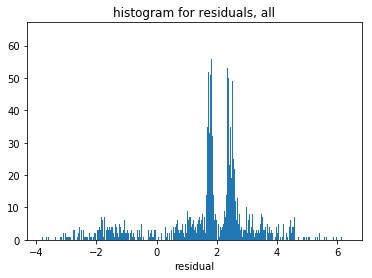

In [25]:
path = './data/'
plt = PlotTwoLevel(path, 'mi_maternal_obstruct.db')
plt.plot_residuals('all')